<a href="https://colab.research.google.com/github/fsenchyna/CSC869_Term_Project/blob/fiona/beeimage-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bee image classification with a convolutional neural network (CNN).

- Make sure GPU is used (Edit -> notebook settings -> hardware accelerator = GPU)
- Inspiration: https://www.youtube.com/watch?app=desktop&v=qFJeN9V1ZsI (Next step: 1:36:45 -> pretrained model)

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Import image data into colab environment as accessing images is very slow from drive. Must first put the train,validate,test folders into a folder called 'beehives' and zip. Then add this to your google drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
zip_path = '/content/drive/MyDrive/beehives.zip'

In [8]:
!cp "{zip_path}" .
!unzip -q beehives.zip
!rm beehives.zip

Process images so that they can be used by the CNN

In [9]:
train_path = 'beehives/Train'
valid_path = 'beehives/Validate'
test_path = 'beehives/Test'

In [10]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224, 224), \
classes=['AntProblem', 'FewVarraoHiveBeetles', 'Healthy', 'HiveBeingRobbed', \
'MissingQueen', 'VarroaSmallHiveBeetles'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(224, 224), \
classes=['AntProblem', 'FewVarraoHiveBeetles', 'Healthy', 'HiveBeingRobbed', \
'MissingQueen', 'VarroaSmallHiveBeetles'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224, 224), \
classes=['AntProblem', 'FewVarraoHiveBeetles', 'Healthy', 'HiveBeingRobbed', \
'MissingQueen', 'VarroaSmallHiveBeetles'], batch_size=10, shuffle=False)

Found 3566 images belonging to 6 classes.
Found 1027 images belonging to 6 classes.
Found 579 images belonging to 6 classes.


This function was taken directly from TensorFlows website, used to preview images in the generator

In [11]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

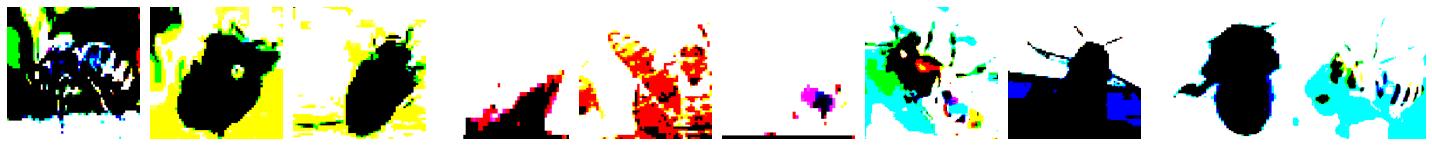

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [12]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

Build simple CNN model

In [15]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
                    MaxPool2D(pool_size=(2, 2), strides=2),
                    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'), 
                    MaxPool2D(pool_size=(2, 2), strides=2),
                    Flatten(),
                    Dense(units=6, activation='softmax'),
])

In [18]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

train model with images in the train and validate folders. Run the images throught the model ten times (epochs=10)

In [20]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
357/357 - 7s - loss: 7.5108 - accuracy: 0.8270 - val_loss: 3.7890 - val_accuracy: 0.8306
Epoch 2/10
357/357 - 7s - loss: 0.5215 - accuracy: 0.9347 - val_loss: 3.4514 - val_accuracy: 0.7868
Epoch 3/10
357/357 - 7s - loss: 0.1894 - accuracy: 0.9672 - val_loss: 2.3596 - val_accuracy: 0.8101
Epoch 4/10
357/357 - 7s - loss: 0.0622 - accuracy: 0.9851 - val_loss: 2.9155 - val_accuracy: 0.8257
Epoch 5/10
357/357 - 7s - loss: 0.0312 - accuracy: 0.9919 - val_loss: 3.6191 - val_accuracy: 0.8014
Epoch 6/10
357/357 - 7s - loss: 0.0055 - accuracy: 0.9986 - val_loss: 3.0495 - val_accuracy: 0.8345
Epoch 7/10
357/357 - 7s - loss: 8.5662e-04 - accuracy: 1.0000 - val_loss: 2.9411 - val_accuracy: 0.8374
Epoch 8/10
357/357 - 7s - loss: 1.8226e-04 - accuracy: 1.0000 - val_loss: 2.9296 - val_accuracy: 0.8462
Epoch 9/10
357/357 - 7s - loss: 1.2420e-04 - accuracy: 1.0000 - val_loss: 2.9295 - val_accuracy: 0.8442
Epoch 10/10
357/357 - 7s - loss: 9.3831e-05 - accuracy: 1.0000 - val_loss: 2.9244 - val_

Use the trained cnn model to predict the images in the test set

In [21]:
predictions = model.predict(x=test_batches, verbose=0).argmax(axis=1)

Round up the predictions so that the highest predicted class is labeled 1 (true) and the other classes are labeled 0 (false), otherwise model will output a percentage confidence for each label for each image in the test set

In [22]:
np.round(predictions)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 1, 5, 1, 5, 1, 5, 1, 2, 1, 1,
       5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 1, 1, 1, 5, 1, 1, 1, 1, 5,
       1, 5, 5, 1, 1, 1, 2, 1, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1,
       1, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [51]:
def plot_confusion_matrix(cm,classes,title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.figure(figsize=(7,7)) # to increase figure(confusion matrix) size

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title=(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=70)
  plt.yticks(tick_marks,classes)
  thresh = cm.max() / 2.


  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

[[ 53   0   1   0   0   0]
 [  0  41   3   0   0  14]
 [  3   0 343  32   0   0]
 [  0   1  22  14   0   0]
 [  0   0   0   0   3   0]
 [  0  12   0   1   0  36]]


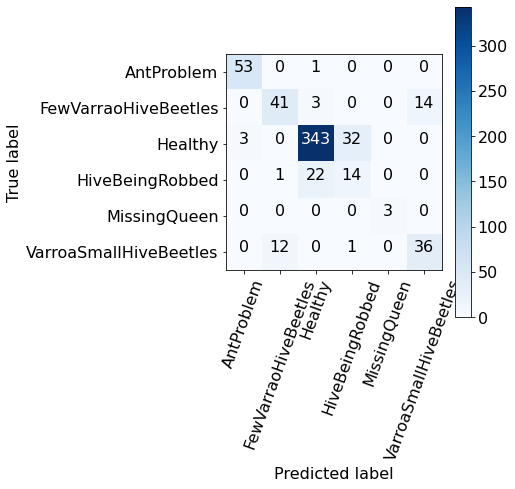

In [52]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=(predictions))
cm_plot_labels=['AntProblem', 'FewVarraoHiveBeetles', 'Healthy', 'HiveBeingRobbed', \
'MissingQueen', 'VarroaSmallHiveBeetles']
print(cm)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=cm_plot_labels)
# disp.plot()
plot_confusion_matrix(cm,cm_plot_labels)